<a href="https://colab.research.google.com/github/Murcha1990/Raiffaizen_ML_summer2023/blob/main/%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_12_features/feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Отбор признаков

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

ds = fetch_california_housing()
X, y = ds.data, ds.target

indexes = np.arange(len(y))
np.random.seed(52342)
np.random.shuffle(indexes)

X = X[indexes, :]
y = y[indexes]

Отбор по корреляции

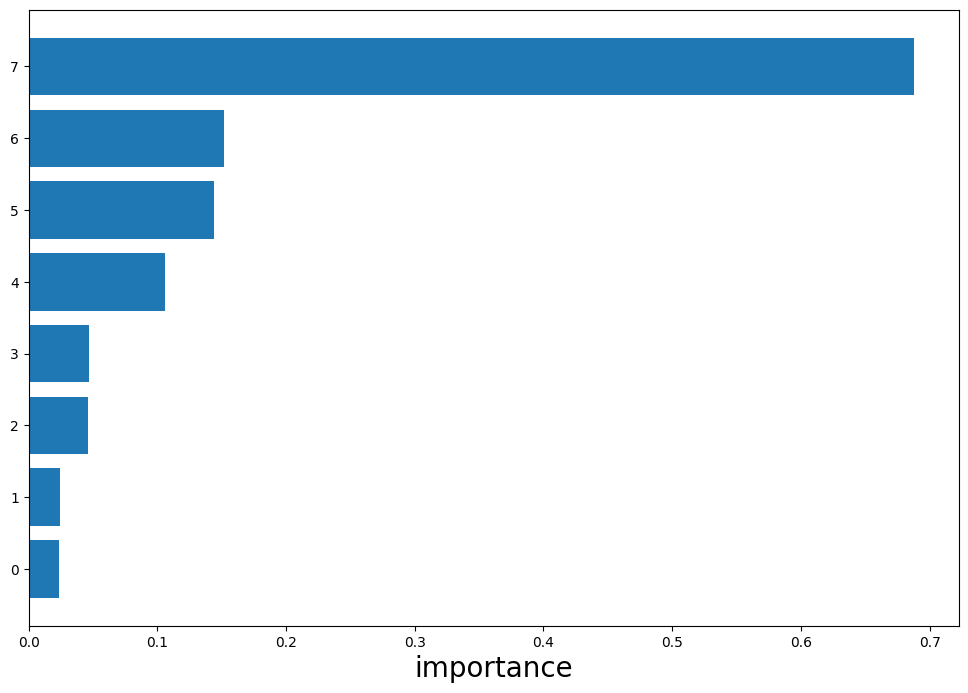

In [ ]:
features_ind = np.arange(X.shape[1])
corrs = np.abs([pearsonr(X[:, i], y)[0] for i in features_ind])
importances_sort = np.argsort(corrs)

fig = plt.figure(figsize=(12,8))
plt.barh(features_ind, corrs[importances_sort])
plt.xlabel('importance', fontsize=20)
X = X[:, importances_sort]

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from tqdm import tqdm

features_counts = np.arange(X.shape[1])

def scores_by_cnt(reg):
    scores = []
    for features_part in tqdm(features_counts):
        X_part = X[:,importances_sort[features_part:]]
        scores.append(cross_val_score(reg, X_part, y).mean())
    return scores

linreg_scores = scores_by_cnt(LinearRegression())
rf_scores = scores_by_cnt(RandomForestRegressor(n_estimators=100, max_depth=3, n_jobs=-1))

100%|██████████| 8/8 [00:49<00:00,  6.19s/it]


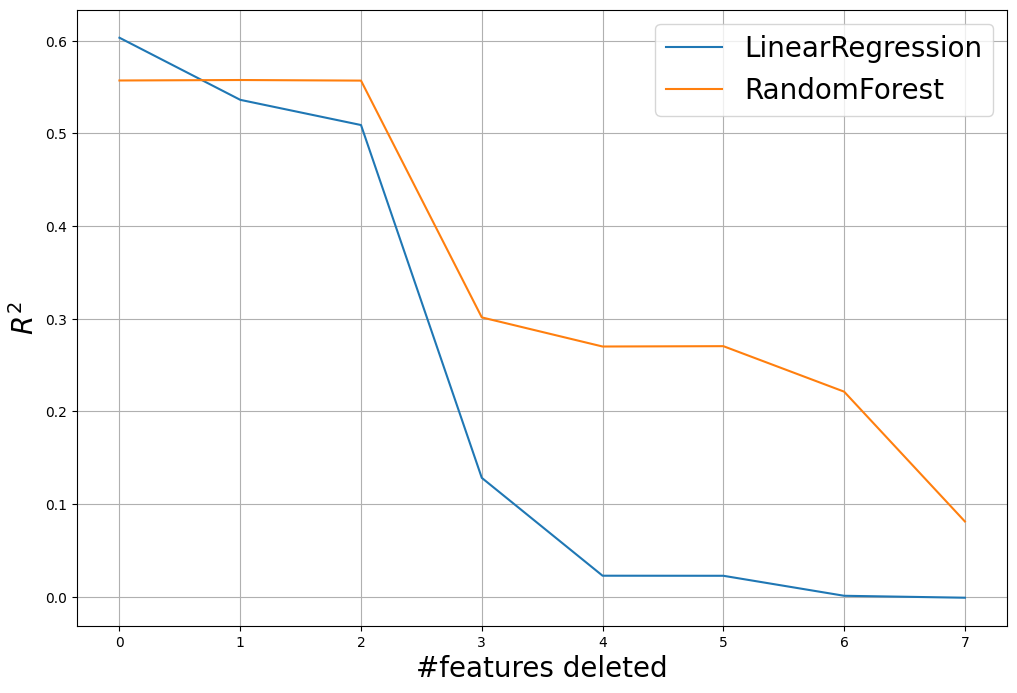

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(features_counts, linreg_scores, label='LinearRegression')
plt.plot(features_counts, rf_scores, label='RandomForest')
plt.legend(loc='best', fontsize=20)
plt.xlabel('#features deleted', fontsize=20)
plt.ylabel('$R^2$', fontsize=20)
plt.grid()

Отбор по взаимной информации

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

select = SelectKBest(score_func=mutual_info_regression, k='all')
z = select.fit_transform(X, y)

importances_sort = np.argsort(select.scores_)

linreg_scores = scores_by_cnt(LinearRegression())
rf_scores = scores_by_cnt(RandomForestRegressor(n_estimators=100, max_depth=3, n_jobs=-1))

100%|██████████| 8/8 [00:45<00:00,  5.70s/it]


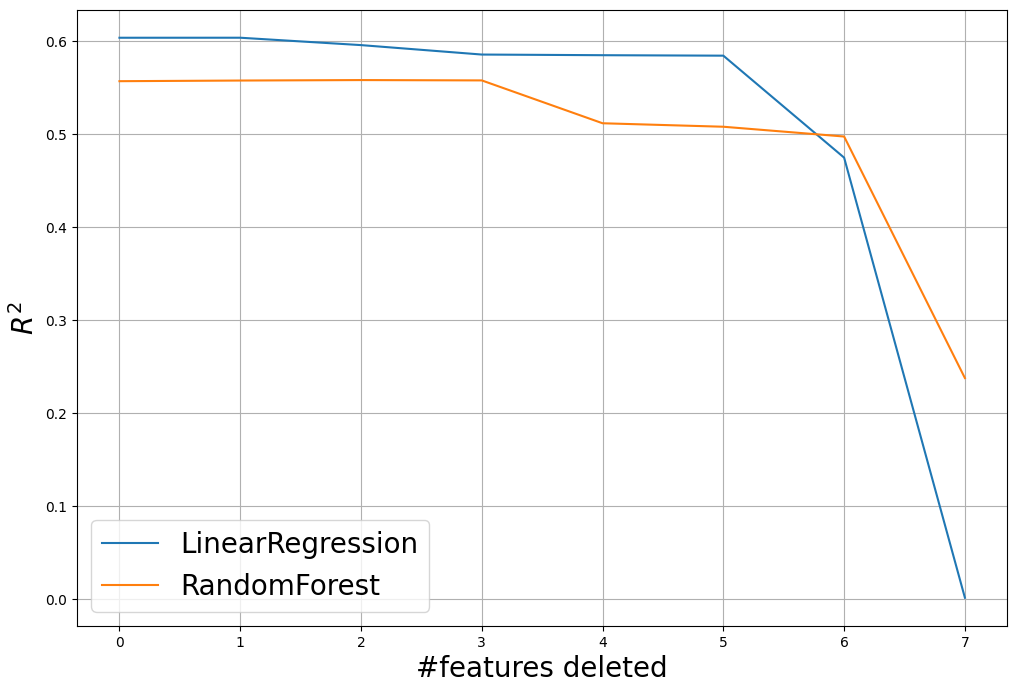

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(features_counts, linreg_scores, label='LinearRegression')
plt.plot(features_counts, rf_scores, label='RandomForest')
plt.legend(loc='best', fontsize=20)
plt.xlabel('#features deleted', fontsize=20)
plt.ylabel('$R^2$', fontsize=20)
plt.grid()

Рекурсивный отбор

In [ ]:
from sklearn.feature_selection import RFE

def scores_by_rfe(reg):
    scores = []
    for num_features in tqdm(np.arange(8,0,-1)):
        estimator = LinearRegression()
        selector = RFE(estimator, n_features_to_select=num_features, step=1)
        selector = selector.fit(X, y)

        X_part = selector.transform(X)
        scores.append(cross_val_score(reg, X_part, y).mean())
    return scores

linreg_scores = scores_by_rfe(LinearRegression())
rf_scores = scores_by_rfe(RandomForestRegressor(n_estimators=100, max_depth=3, n_jobs=-1))

100%|██████████| 8/8 [00:44<00:00,  5.60s/it]


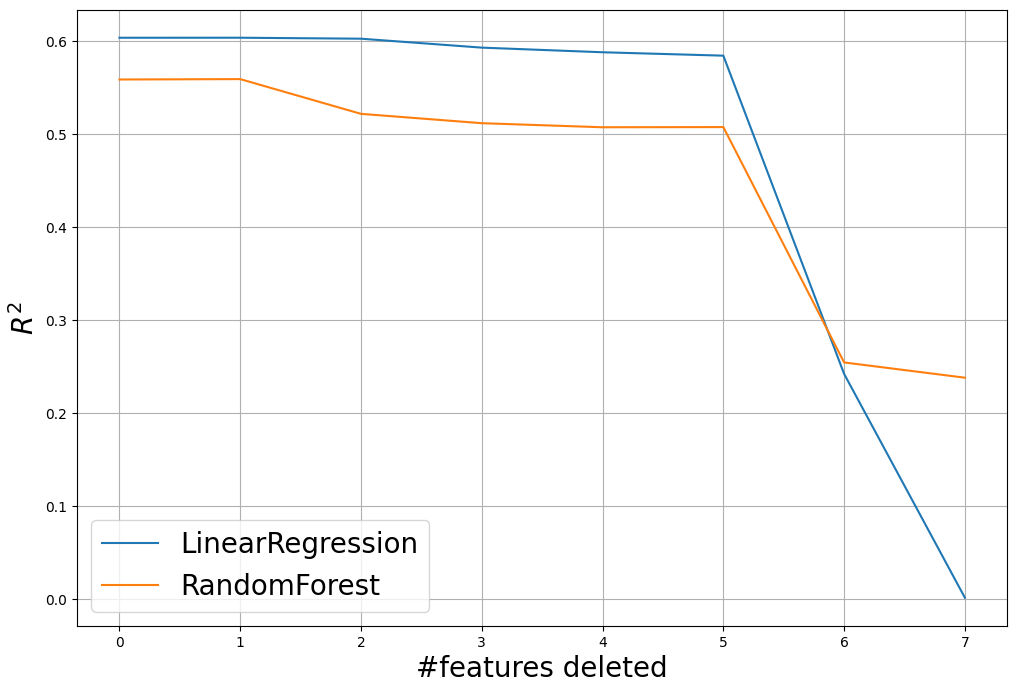

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(features_counts, linreg_scores, label='LinearRegression')
plt.plot(features_counts, rf_scores, label='RandomForest')
plt.legend(loc='best', fontsize=20)
plt.xlabel('#features deleted', fontsize=20)
plt.ylabel('$R^2$', fontsize=20)
plt.grid()

Отбор по модели

In [ ]:
from sklearn.feature_selection import SelectFromModel

estimator = LinearRegression()
selector = SelectFromModel(estimator)
selector = selector.fit(X, y)

importances_sort = np.argsort(selector.estimator_.coef_)

linreg_scores = scores_by_cnt(LinearRegression())
rf_scores = scores_by_cnt(RandomForestRegressor(n_estimators=100, max_depth=3, n_jobs=-1))

100%|██████████| 8/8 [00:52<00:00,  6.60s/it]


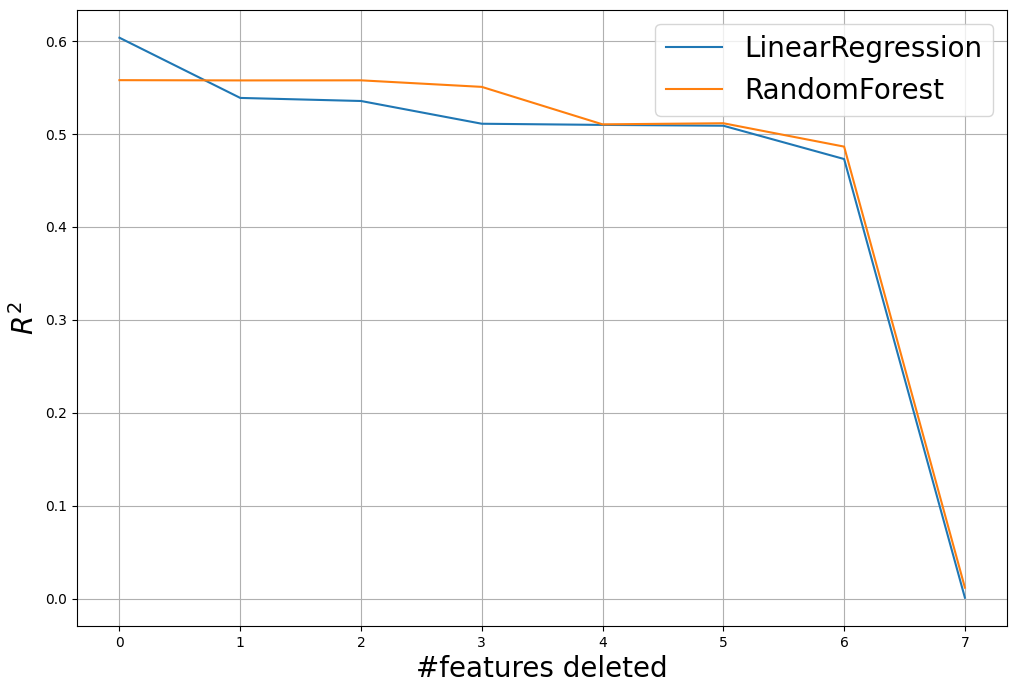

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(features_counts, linreg_scores, label='LinearRegression')
plt.plot(features_counts, rf_scores, label='RandomForest')
plt.legend(loc='best', fontsize=20)
plt.xlabel('#features deleted', fontsize=20)
plt.ylabel('$R^2$', fontsize=20)
plt.grid()